In [1]:
# Welcome to InnoVest!

print(f'Enjoy reviewing our InnoVest mainframe code!')

Enjoy reviewing our InnoVest mainframe code!


In [2]:
# Introduction: Setting the Story

# Some investors profit by finding stocks that are overvalued or undervalued based on market sentiment. 

# They use various indicators such as Bullish Indicator, Volatility Index & more to measure market sentiment that help determine the best stocks to trade. 

# Popular sentiment indicators include the Internet Search Activity such as Google Trends, Twitter/X commentary and Facebook activity

print(f'Lets gather some data now... shall we?')

Lets gather some data now... shall we?


In [3]:
# Imports & Engines

import pandas as pd
import hvplot.pandas
from pathlib import Path
import os
import requests
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Load .env environment to ensure all systems go!

print(f'All systems ready?!')

load_dotenv()

All systems ready?!


True

In [4]:
# API Keys - Set Alpaca API key and secret

alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

#Create Alpaca API object

alpaca_api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="V2")

In [5]:
# Format start and end dates as ISO format for One Year period

start = pd.Timestamp("2022-08-02", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-08-02", tz="America/New_York").isoformat()

# Configure Data Parameters

tickers = ['SPY', 'TSLA', 'LCID', 'F', 'META', 'RBLX', 'AAPL', 'GOOG', 'MSFT', 'NVDA']

# Adjusting Timeframe to 1Week instead of 1Day due to Google Trends Data Output

timeframe = "1Week"

# Get closing price market data for specitfically identified 'innovative' stocks, for last year

portfolio_year_df = alpaca_api.get_bars(tickers, timeframe, start=start, end=end).df

# Clean up data to have information we need and interested in

portfolio_year_df.drop(columns=['open', 'high', 'low', 'volume', 'trade_count', 'vwap'], inplace=True)

In [6]:
# Separate Specific Ticker Information from Dataframe

spy_data = portfolio_year_df[portfolio_year_df['symbol'] == 'SPY']
tsla_data = portfolio_year_df[portfolio_year_df['symbol'] == 'TSLA']
lcid_data = portfolio_year_df[portfolio_year_df['symbol'] == 'LCID']
f_data = portfolio_year_df[portfolio_year_df['symbol'] == 'F']
meta_data = portfolio_year_df[portfolio_year_df['symbol'] == 'META']
rblx_data = portfolio_year_df[portfolio_year_df['symbol'] == 'RBLX']
aapl_data = portfolio_year_df[portfolio_year_df['symbol'] == 'AAPL']
goog_data = portfolio_year_df[portfolio_year_df['symbol'] == 'GOOG']
msft_data = portfolio_year_df[portfolio_year_df['symbol'] == 'MSFT']
nvda_data = portfolio_year_df[portfolio_year_df['symbol'] == 'NVDA']

# Clean up and isolate separate Stock Market Data for Closing Price only, and get Daily Returns

spy_daily_returns = spy_data['close'].pct_change()
tsla_daily_returns = tsla_data['close'].pct_change()
lcid_daily_returns = lcid_data['close'].pct_change()
f_daily_returns = f_data['close'].pct_change()
meta_daily_returns = meta_data['close'].pct_change()
rblx_daily_returns = rblx_data['close'].pct_change()
aapl_daily_returns = aapl_data['close'].pct_change()
goog_daily_returns = goog_data['close'].pct_change()
msft_daily_returns = msft_data['close'].pct_change()
nvda_daily_returns = nvda_data['close'].pct_change()

# Combined Daily Returns into Dataframe with all Stocks

combined_dly_rtn = pd.concat([spy_daily_returns, tsla_daily_returns, lcid_daily_returns, f_daily_returns, meta_daily_returns, rblx_daily_returns, aapl_daily_returns, goog_daily_returns, msft_daily_returns, nvda_daily_returns], axis="columns", join="inner")

# Remame Columns in newly created concatenated Daily Returns DataFrame

combined_dly_rtn.columns = ["SPY", "TSLA", "LCID", "F", "META", "RBLX", "AAPL", "GOOG", "MSFT", "NVDA"]

# Isolate specific stocks to show Daily Returns for that particular innovative sector in future recommended portfolio

ev_port_daily = combined_dly_rtn.iloc[:,1:4]
meta_port_daily = combined_dly_rtn.iloc[:,4:7]
ai_port_daily = combined_dly_rtn.iloc[:,6:9]

# Show cleaned up, individual stock Daily Returns together

combined_dly_rtn.head()

,SPY,TSLA,LCID,F,META,RBLX,AAPL,GOOG,MSFT,NVDA
timestamp,,,,,,,,,,
2022-08-08 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-15 04:00:00+00:00,-0.011613,-0.011210,-0.102358,-0.018541,-0.069474,-0.165591,-0.003370,-0.036934,-0.019732,-0.045967
2022-08-22 04:00:00+00:00,-0.039868,-0.676303,-0.030448,-0.029597,-0.036794,-0.073102,-0.046059,-0.057738,-0.063114,-0.089025
2022-08-29 04:00:00+00:00,-0.032247,-0.062064,-0.066502,-0.016223,-0.009025,-0.040950,-0.047733,-0.023540,-0.044873,-0.160701
2022-09-05 04:00:00+00:00,0.036610,0.109063,-0.005277,0.017150,0.055077,0.200053,0.010012,0.028524,0.032805,0.054224


In [7]:
# Write Code showing Annualized Standard Deviation

daily_std = combined_dly_rtn.std()

# Identify the stock with the most risk

daily_std = combined_dly_rtn.std().sort_values()

# Calculate the annualized standard deviation (52 weeks for each week of data)

annualized_std = daily_std * np.sqrt(52)

# What's the story here?

print('')
print(f'Standard deviation is useful for measuring the absolute risk of an asset or a portfolio, regardless of the market or benchmark.') 
print('')
print(f'It helps investors to assess the potential range of outcomes and the probability of achieving a certain return.')
print('')

annualized_std.hvplot.bar(xlabel='Stock Ticker $', ylabel='Annualized Standard Deviation', title='Volatility', color='red')


Standard deviation is useful for measuring the absolute risk of an asset or a portfolio, regardless of the market or benchmark.

It helps investors to assess the potential range of outcomes and the probability of achieving a certain return.



:Bars   [index]   (0)

[*********************100%***********************]  1 of 1 completed


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,73.63,2021-11-04,2023-01-03,NaT,NaN
1,60.63,2020-02-19,2020-03-18,2020-06-08,79
2,53.51,2017-09-18,2019-06-03,2019-12-18,588
3,49.77,2014-09-04,2016-02-10,2017-04-03,673
4,38.46,2010-11-24,2011-02-23,2012-03-12,339


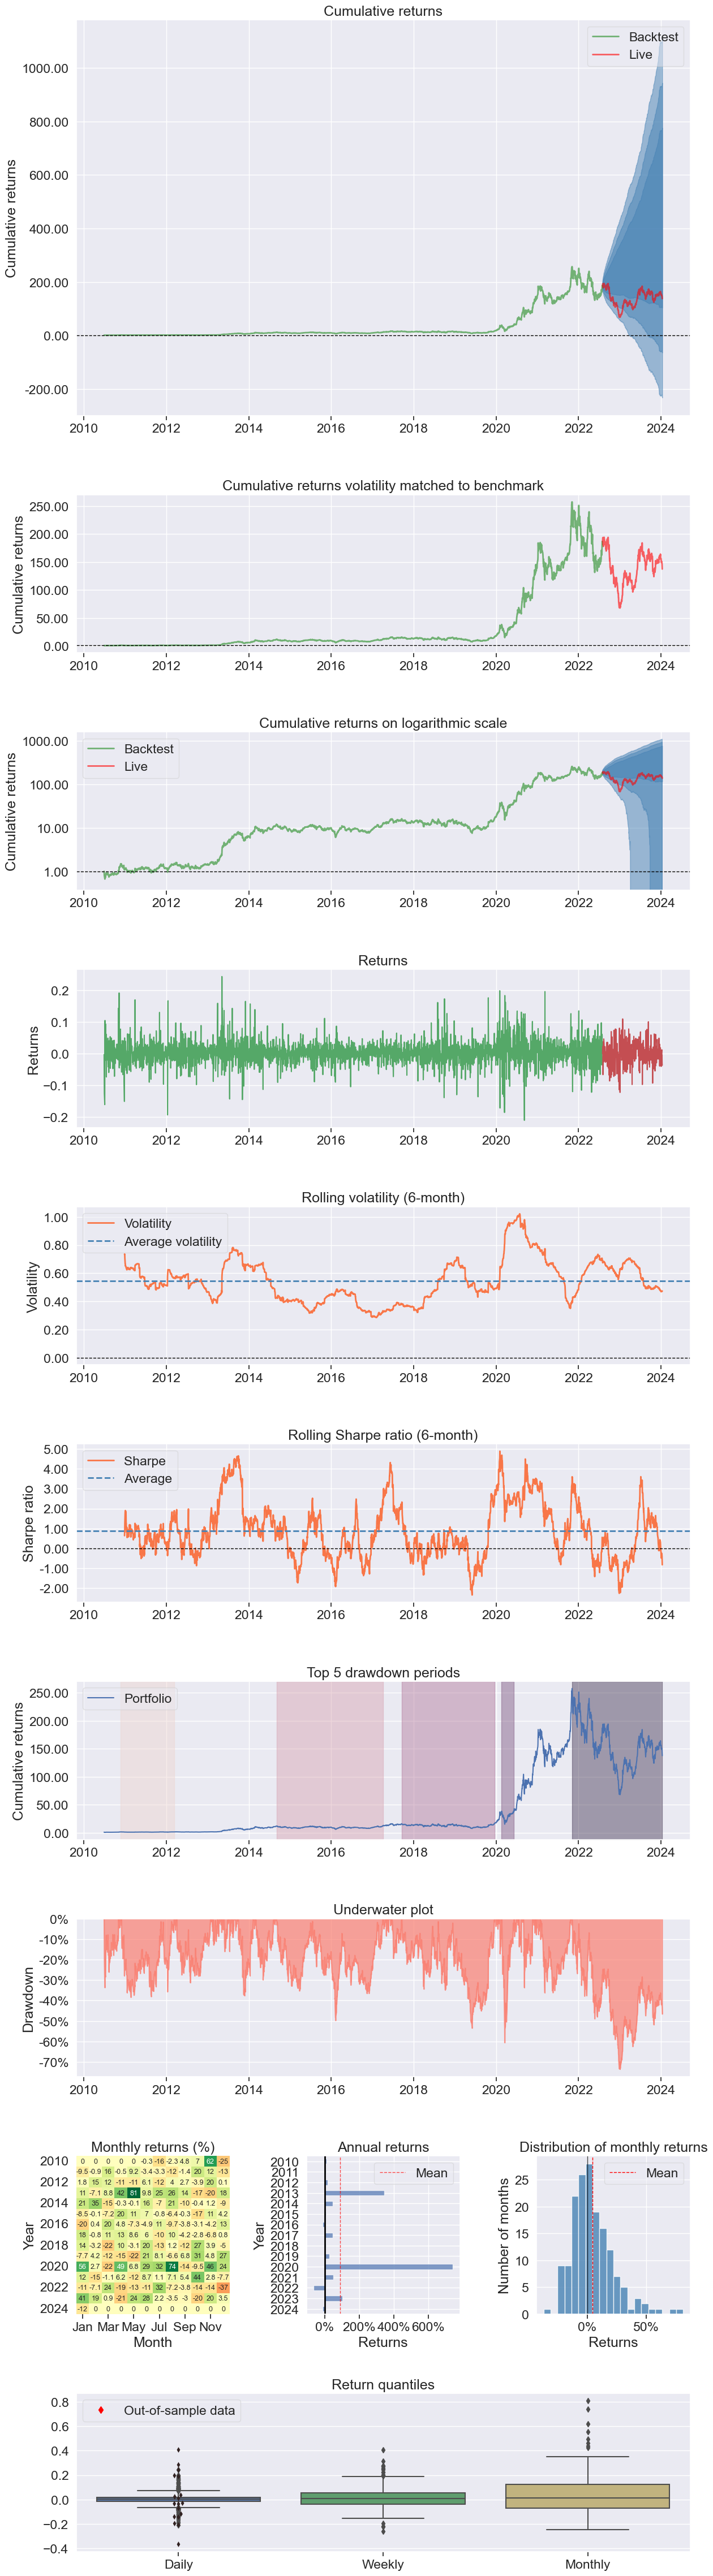

In [8]:
# New Library or Tools to be used here

# Import NEW libraries

# Make sure you download required libs and resources by using 'pip install pyfolio-reloaded' in your Terminal/Command Prompt/Anaconda Prompt
import pyfolio as pf # Make sure you download required libs and resources by using 'pip install pyfolio' in your Terminal/Command Prompt/Anaconda Prompt
import riskfolio as rp # Make sure you download required libs and resources by using 'pip install riskfolio' in your Terminal/Command Prompt/Anaconda Prompt
from empyrial import empyrial, Engine # Make sure you download required libs and resources by using 'pip install riskfolio-lib' in your Terminal/Command Prompt/Anaconda Prompt# 
import yfinance as yf
import warnings

# Test out new Libraries Space

tesla_stock_history = pf.utils.get_symbol_rets('TSLA')
tesla_stock_history.head()

# Show every iterable financial technical analysis measurables
pf.create_returns_tear_sheet(tesla_stock_history, live_start_date='2022-08-01')

[*********************100%***********************]  9 of 9 completed

Here we show Daily Returns gathered using our new library rather than traditional csv file manner:



,AAPL,F,GOOGL,LCID,META,MSFT,NVDA,RBLX,TSLA
Date,,,,,,,,,
2022-08-02,-0.009287,-0.011734,0.002351,0.064760,0.001626,-0.011474,0.004609,0.001105,0.011134
2022-08-03,0.038248,0.034960,0.025623,0.042068,0.053749,0.027836,0.019810,0.037757,0.022656
2022-08-04,-0.001926,-0.020395,0.000932,-0.097276,0.010486,0.004177,0.017043,0.020426,0.004023
2022-08-05,-0.001389,-0.004554,-0.006092,-0.027478,-0.020285,-0.002609,-0.011762,0.026689,-0.066303
2022-08-08,-0.002903,0.031373,-0.001447,0.037119,0.018790,-0.009155,-0.062984,-0.006905,0.007819


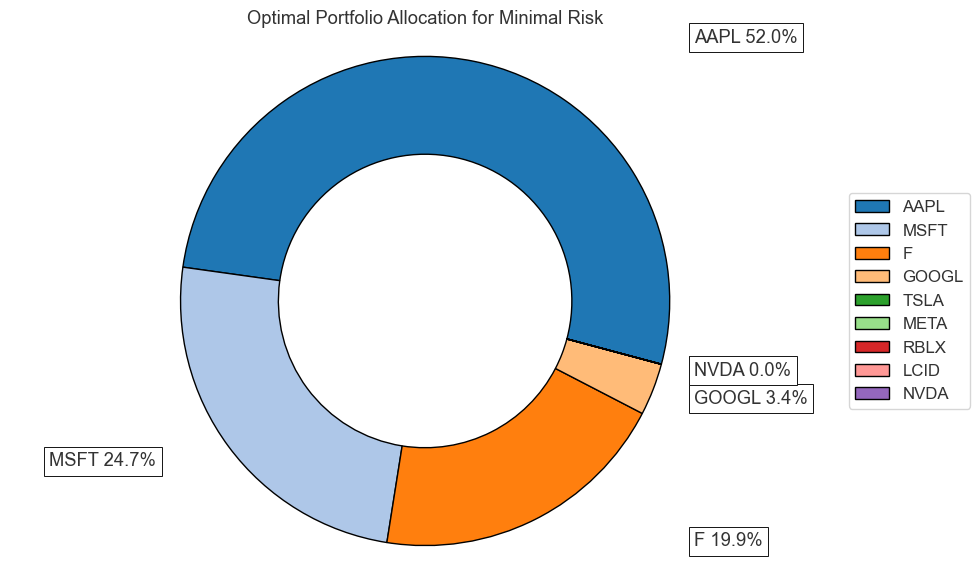

In [9]:
# Tie in the original 'Nine' innovative stocks

# Date range
start = '2022-08-01'
end = '2023-08-01'

# Tickers of assets
assets = ['LCID', 'TSLA', 'F', 'META', 'RBLX', 'AAPL', 'MSFT',
          'GOOGL', 'NVDA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

# Calculating Daily returns

Y = data[assets].iloc[-252:,:].pct_change().dropna()

print('')
print(f'Here we show Daily Returns gathered using our new library rather than traditional csv file manner:')
print('')
display(Y.head())

# Bringing in Portfolio Data

port = rp.Portfolio(returns=Y)

# Process to calculate optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate/simulate a optimal portfolio with MINIMAL RISK:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

# Build out Portfolio Optomization under Mimimal Risk Parameters

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

# Plotting the composition of the optimal portfolio for risk-adverse/conservative investors:

ax = rp.plot_pie(w=w, title='Optimal Portfolio Allocation for Minimal Risk', others=.5, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

points = 50 # Number of points of the frontier / similar to simulated amounts in Monte Carlo

In [10]:
# Building out Portfolio with Data needed to Optimize

# FinQuant library is great with it's ability to simplify original libraries that newer ones like FinQuant were built on, to make simple and user-friendly

from finquant.portfolio import build_portfolio

# If required, or preferred, the below code shows how the same is achieved by manually creating an instance of EfficientFrontier, passing it the mean returns and covariance matrix of the previously assembled portfolio.

all_stocks = {
    0: {"Name": "LCID"},
    1: {"Name": "TSLA"},
    2: {"Name": "F"},
    3: {"Name": "META"},
    4: {"Name": "RBLX"},
    5: {"Name": "AAPL"},
    6: {"Name": "MSFT"},
    7: {"Name": "GOOG"},
    8: {"Name": "NVDA"}
}

all_stocks_port = pd.DataFrame.from_dict(all_stocks, orient="index")

# here we set the list of names based on the names in the DataFrame pf_allocation
names = all_stocks_port["Name"].values.tolist()

# dates can be set as datetime or string, as shown below:
start_date = "2022-08-01"
end_date = "2023-08-01"

# the market index used to compare the portfolio to (in this case S&P 500). If the parameter is omitted, no market comparison will be done
market_index = "^GSPC"

In [11]:
# Build out experimental proof-of-concept customizable DataFrame to ingest market data and portfolio alllocation, optimization, etc.

pf_test = build_portfolio(
    names=names,
    start_date=start_date,
    end_date=end_date,
    data_api="yfinance",
    market_index=market_index,
)

# Show Data
print('')
print(f'Showing closing prices for innovative stocks in last year:')
print('')
pf_test.data

[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  1 of 1 completed

Showing closing prices for innovative stocks in last year:



,LCID,TSLA,F,META,RBLX,AAPL,MSFT,GOOG,NVDA
Date,,,,,,,,,
2022-08-01,18.530001,297.276672,13.603072,159.929993,45.240002,160.123856,274.210144,115.480003,184.226318
2022-08-02,19.730000,300.586670,13.443455,160.190002,45.290001,158.636719,271.063721,115.900002,185.075470
2022-08-03,20.559999,307.396667,13.913444,168.800003,47.000000,164.704193,278.609192,118.779999,188.741806
2022-08-04,18.559999,308.633331,13.629676,170.570007,47.959999,164.386948,279.773041,118.870003,191.958603
2022-08-05,18.049999,288.170013,13.567601,167.110001,49.240002,164.158600,279.043213,118.220001,189.700851
...,...,...,...,...,...,...,...,...,...
2023-07-25,6.840000,265.279999,13.371504,294.470001,39.660000,193.104492,349.529053,122.790001,456.712219
2023-07-26,7.170000,264.350006,13.460123,298.570007,39.950001,193.982147,336.373657,129.660004,454.442596
2023-07-27,6.890000,255.710007,13.519201,311.709991,37.910000,192.705551,329.352783,129.869995,458.921844


In [12]:
# Sector Focused New Library Market Data

ev_stocks = {
    0: {"Name": "TSLA"},
    1: {"Name": "LCID"},
    2: {"Name": "F"}
}

ev_stocks_port = pd.DataFrame.from_dict(ev_stocks, orient="index")

# here we set the list of names based on the names in the DataFrame pf_allocation
ev_names = ev_stocks_port["Name"].values.tolist()

# dates can be set as datetime or string, as shown below:
start_date = "2022-08-01"
end_date = "2023-08-01"

# the market index used to compare the portfolio to (in this case S&P 500). If the parameter is omitted, no market comparison will be done
market_index = "^GSPC"

# Build out experimental proof-of-concept customizable DataFrame to ingest market data and portfolio alllocation, optimization, etc.

ev_test = build_portfolio(
    names=ev_names,
    start_date=start_date,
    end_date=end_date,
    data_api="yfinance",
    market_index=market_index,
)

# Show Data

ev_test.data

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


,TSLA,LCID,F
Date,,,
2022-08-01,297.276672,18.530001,13.603074
2022-08-02,300.586670,19.730000,13.443455
2022-08-03,307.396667,20.559999,13.913444
2022-08-04,308.633331,18.559999,13.629676
2022-08-05,288.170013,18.049999,13.567602
...,...,...,...
2023-07-25,265.279999,6.840000,13.371504
2023-07-26,264.350006,7.170000,13.460123
2023-07-27,255.710007,6.890000,13.519201


In [13]:
# Bringing in Portfolio Data in New Library

portfolio_data = rp.Portfolio(returns=Y)

# Select optimization method and estimate input (covariance) parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

# Built-in parameters

portfolio_data.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate/simulate a optimal portfolio with MINIMAL RISK:

# Setting Portfolio Optimization COnditions

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

# Capture optimization and save in repeatable code

w = portfolio_data.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

In [14]:
opt_w, opt_res = pf_test.mc_optimisation(num_trials=5000)
pf_test.mc_properties()

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time period: 252 days
Expected return: 0.207
Volatility: 0.296
Sharpe Ratio: 0.681

Optimal weights:
                LCID      TSLA         F      META      RBLX      AAPL  \
Allocation  0.020613  0.081615  0.155976  0.011808  0.054346  0.250714   

                MSFT      GOOG      NVDA  
Allocation  0.244628  0.146413  0.033887  
----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time period: 252 days
Expected return: 0.639
Volatility: 0.382
Sharpe Ratio: 1.660

Optimal weights:
                LCID      TSLA         F      META      RBLX      AAPL  \
Allocation  0.001999  0.031317  0.037689  0.305679  0.049776  0.054863   

                MSFT      GOOG     NVDA  
Allocation  0.119914  0.122143  0.27662  
----------------------------------------------------------------------


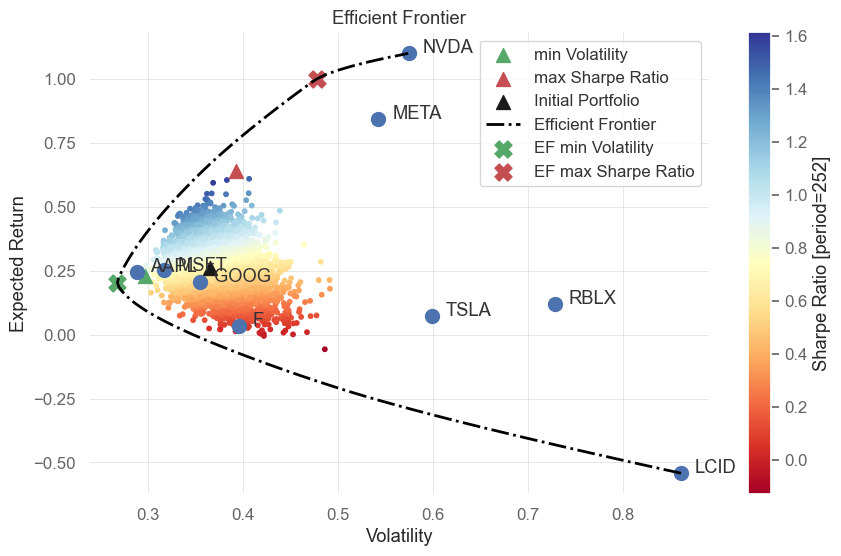

In [15]:
# Portfolio and Plots Results for Monte Carlo simulations ran 5000 times or iterations

opt_w, opt_res = pf_test.mc_optimisation(num_trials=5000)

# Plot of the results from aforementioned Monte Carlo optimisation

pf_test.mc_plot_results()

# Plot of the Efficient Frontier for Innovative Stocks

pf_test.ef_plot_efrontier()

# Plot of Optimal Portfolio using Efficient Frontier

pf_test.ef.plot_optimal_portfolios()

# Plot legend showing individual stocks 

pf_test.plot_stocks()

# Overlay of all aforementioned plots of the specific portfolio analysis and optimization based on historical data

plt.show()

In [16]:
# Set up Sentimental Trading Data (Proprietary Trend Analysis Engine) configuration

# Configure Resource Folder for csv. downloaded from Google Trends and ingested into Innovest Sentiment Trading Engine

electric_file = Path('./Resources/electric_trend.csv')
meta_file = Path('./Resources/meta_trend.csv')
ai_file = Path('./Resources/ai_trend.csv')

electric_trend_csv = pd.read_csv(electric_file, index_col="Week", parse_dates=True, infer_datetime_format=True)
meta_trend_csv = pd.read_csv(meta_file, index_col="Week", parse_dates=True, infer_datetime_format=True)
ai_trend_csv = pd.read_csv(ai_file, index_col="Week", parse_dates=True, infer_datetime_format=True)

# Concatenate all Innovative Sectors into One Big DataFrame

trends_df = pd.concat([electric_trend_csv, meta_trend_csv, ai_trend_csv], axis="columns", join="inner")

# Google Trends Standard Deviation (volatility of consistency/relevance)

weekly_trends_std  = trends_df.std()

# Identify specific trends designated by 'Company Name' + 'Sector Name'

tsla_trend = trends_df['Tesla Electric Vehicle']
lcid_trend = trends_df['Lucid Electric Vehicle']
f_trend = trends_df['Ford Electric Vehicle']
meta_trend = trends_df['Facebook Metaverse']
rblx_trend = trends_df['Roblox Metaverse']
aapl_trend = trends_df['Apple Metaverse']
google_trend = trends_df['Google Artificial Intelligence']
msft_trend = trends_df['Microsoft Artificial Intelligence']
nvda_trend = trends_df['Nvidia Artificial Intelligence']

# Combine and show Innovative sector specific trends

ev_trends = pd.concat([tsla_trend, lcid_trend, f_trend], axis = 'columns', join='inner')
meta_trends = pd.concat([meta_trend, rblx_trend, aapl_trend], axis = 'columns', join='inner')
ai_trends = pd.concat([google_trend, msft_trend, nvda_trend], axis = 'columns', join='inner')

# Explain Findings

print(f'Considering standard deviation implies not only a carried implied risk, but also visualizes degree of probability.')
print('')
print(f'The greater we see the swings in ability to remain "popular" or at the forefront of the inovative space, the "more" unlikely you are considered to stay relevant:')
print('')

# Show the plot

trend_tbl = weekly_trends_std.hvplot.bar(
    xlabel='Company + Sector Name',
    ylabel='Annualized Trend Standard Deviation',
    title='Innovative Disruptor or Playing Catch Up? (higher score is better)',
    yformatter= '%.2f',
    width = 1400,
    height = 600
)

trend_tbl

Considering standard deviation implies not only a carried implied risk, but also visualizes degree of probability.

The greater we see the swings in ability to remain "popular" or at the forefront of the inovative space, the "more" unlikely you are considered to stay relevant:



:Bars   [index]   (0)

In [17]:
# Correlation between Trends and Stock Performance

# Setting the table of comparisons (choosing from many sectors)

ev_trend_plot = ev_trends.hvplot(xlabel='Week #', ylabel='Google Trend Score', title='Google Trends in last 12 Months for Electric Vehicle Companies', yformatter= '%.2f')

# Show Sector Specific plot

ev_trend_plot

:NdOverlay   [Variable]
   :Curve   [Week]   (value)

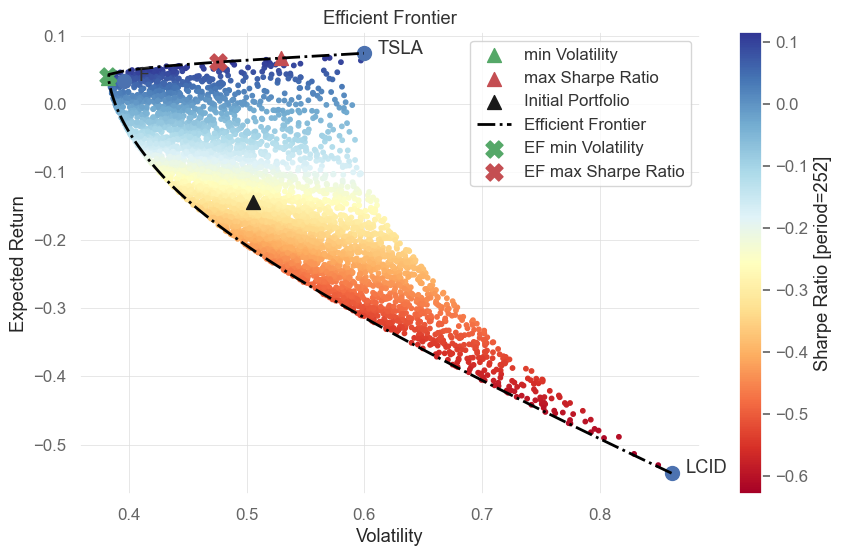

In [18]:
# Custom Generated Portfolio and Plots Results for Monte Carlo simulations ran 5000 times or iterations

# Use any other sector to demonstrate user interaction experience

opt_w, opt_res = ev_test.mc_optimisation(num_trials=5000)

# Plot of the results from aforementioned Monte Carlo optimisation

ev_test.mc_plot_results()

# Plot of the Efficient Frontier for Innovative Stocks

ev_test.ef_plot_efrontier()

# Plot of Optimal Portfolio using Efficient Frontier

ev_test.ef.plot_optimal_portfolios()

# Plot legend showing individual stocks 

ev_test.plot_stocks()

# Overlay of all aforementioned plots of the specific portfolio analysis and optimization based on historical data

plt.show()

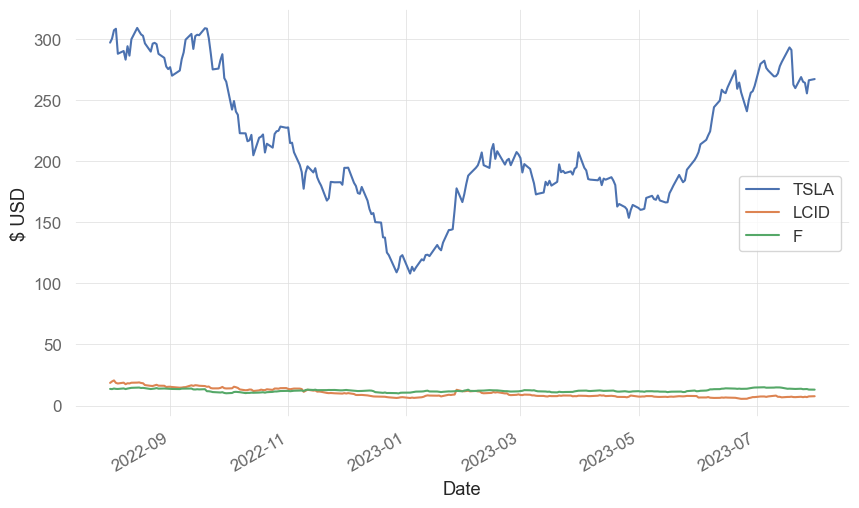

In [19]:
# Moving Averages - our measure of "Trend" or relative correlation to Google Trends to determine any similarities, patterns or noticable analysis in data

# `FinQuant` provides a module `finquant.moving_average` to compute moving averages.
# importing specific function for custom market data

from finquant.moving_average import sma

# Simple moving average for Electric Vehicles

ev_stock_plot = ev_test.data.plot(grid=True, ylabel='$ USD')

In [20]:
# Visualization to analyze and determine Google Trends comparison/correlation to Moving Averages Tables shown above

display(ev_trend_plot) 
display(ev_stock_plot)

:NdOverlay   [Variable]
   :Curve   [Week]   (value)

<Axes: xlabel='Date', ylabel='$ USD'>

Show explanation of Moving Averages with BUy/Sell signal function

Just another example to show how dynamic our newly imported libraries are:

Computes a band of moving averages (sma or ema, depends on the input argument
    `fun`) for a number of different time windows. If `plot` is `True`, it also
    computes and sets markers for buy/sell signals based on crossovers of the Moving
    Averages with the shortest/longest spans.

    :Input:
     :data: pandas.DataFrame, or pandas.Series, with stock prices
         (if pandas.DataFrame: only one column is expected)
     :fun: function that computes a moving average, e.g. sma (simple) or
         ema (exponential).
     :spans: list of integers, time windows to compute the Moving Average on.
     :plot: boolean (default: True), whether to plot the moving averages
         and buy/sell signals based on crossovers of shortest and longest
         moving average.

    :Output:
     :ma: pandas.DataFrame with moving averages of given data.
 

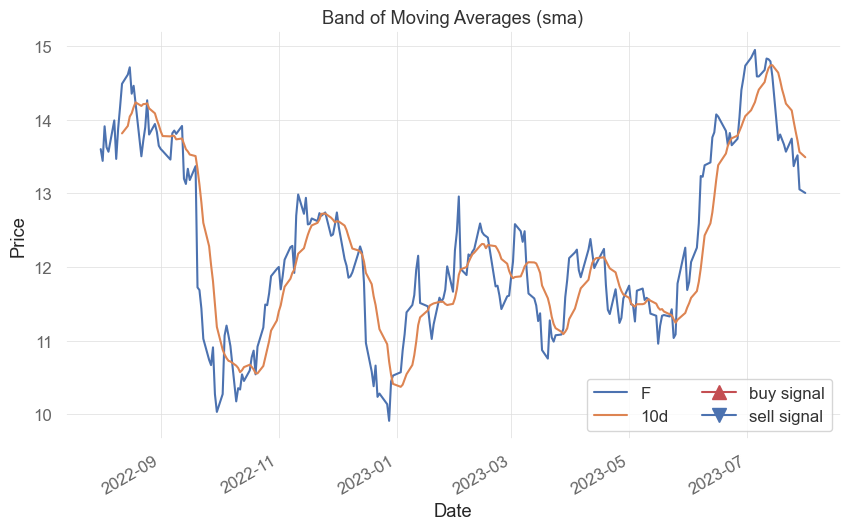

In [21]:
# Experimental Advanced: Band of Moving Averages with Buy/Sell signals

# `FinQuant` also provides a method `finquant.moving_average.compute_ma` that automatically computes and plots several moving averages. It also **finds buy/sell signals based on crossovers** of the shortest and longest moving average.

from finquant.moving_average import compute_ma

print(f'Show explanation of Moving Averages with BUy/Sell signal function')
print('')

print(f'Just another example to show how dynamic our newly imported libraries are:')
print('')

print(compute_ma.__doc__)

# Gather market data for Ford

f = pf_test.get_stock("F").data.copy(deep=True)

# We decided to choose moving averages in span of 10 days, instead of 20, 25, 50, or 100 because of limited 1 year time span, alongside 10days compromises full week sandwiched between two weekends and five weekdays.

spans = [10]

# Compute Moving Averages

f_ma = compute_ma(f, sma, spans, plot=True)

# Plot Moving Averages

plt.show()